# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
df_train = pd.read_csv("Data/train.csv")
df_train.head()

/tmp/ipykernel_6741/446462971.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("Data/train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Basic EDA

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

1. We have null values which we need to take care of.
2. We have features with incorrect data type so we need to correct the data types too.

In [4]:
df_train.shape
# (datapoints, features)

(100000, 28)

In [5]:
# statistical info about numerical features only 
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


There are outliers in most of the features. The difference between the mean and the max value and the standard deviation shows that. So we need to tackle that.

In [6]:
# statistical info about categorical features only 
df_train.describe(include=object).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [7]:
df = df_train.copy()

1. "Monthly_Balance" which should be a numerical feature has incorrect datatype and on the top of that the data point has strange values i.e "__". So before converting that into numerical feature we have to take care of that.
2. "Credit_History_Age": we need to create a custome function to convert it into numbers.

To handle null values and also the outliers, I will be using "group mode". Grouping will be done on the basis of customer_id.

# Data Cleaning, Data type fix and replaceing Null values

## Cleaning

In [8]:
# Check Duplicated Data
df.duplicated().any()

False

In [9]:
# Since we are doing grouping on the basis of customer_id we have to be sure that it does not have null
df["Customer_ID"].isnull().sum()

0

In [10]:
df["Customer_ID"].describe()

count        100000
unique        12500
top       CUS_0xd40
freq              8
Name: Customer_ID, dtype: object

We have 12,500 unique customers. These customers have taken multiple loans and each loan taken by the customer has become a row in our dataset.

In [11]:
#dropping unnecessary columns
df_1 = df.drop(columns=["ID","Name","SSN"])
# columns with unique values do not contribute to the model building process. hence dropped
# Note: Customer_ID is also such column and we are going to drop it too when we are done with the cleaning.

Detect strange values (in those columns which have string) apart from the NaN Values and convert them to NaN.

In [12]:
object_col = df_1.describe(include="O").columns
object_col

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [13]:
for i in object_col:
    print(f"----------------{i}------------------")
    print(df_1[i].value_counts())
    print("\n")

----------------Customer_ID------------------
Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64


----------------Month------------------
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64


----------------Age------------------
Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: count, Length: 1788, dtype: int64


----------------Occupation------------------
Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
En

In [14]:
# Clear strange values apart from the NaN Values
def text_cleaning(data):
    if data is np.NaN or not isinstance(data, str): # isinstance(data, str) checks if data is string or not
        return data
    else:
        return str(data).strip("_ ,")

In [15]:
df_1 = df_1.applymap(text_cleaning)
df_1 = df_1.replace(["", "nan", "!@9#%8"],np.NaN)
# "!@9#%8" was in payment behiaviour column

In [16]:
def missing_data(dataframe):
    dataframe_copy = dataframe.copy()
    dataframe_copy = dataframe_copy.isnull().sum().reset_index()
    dataframe_copy.columns = ["Feature", "Null_Values"]
    total_data = dataframe.shape[0]
#     print(total_data)
    dataframe_copy["%_age"] = dataframe_copy["Null_Values"] / total_data * 100
    return dataframe_copy[dataframe_copy["Null_Values"] != 0]

In [17]:
# Check for missing values
missing_data(df_1)

,Feature,Null_Values,%_age
3,Occupation,7062,7.062
5,Monthly_Inhand_Salary,15002,15.002
10,Type_of_Loan,11408,11.408
12,Num_of_Delayed_Payment,7002,7.002
13,Changed_Credit_Limit,2091,2.091
14,Num_Credit_Inquiries,1965,1.965
15,Credit_Mix,20195,20.195
18,Credit_History_Age,9030,9.030
21,Amount_invested_monthly,4479,4.479
22,Payment_Behaviour,7600,7.600


1. Majority of null values are in "Credit_Mix", "Monthly_Inhand_Salary" and "Type_of_Loan" Columns
2. There is no Null Value in the Target columns (Credit score) otherwise we had to drop that row completely and not replacing it with anything.
3. Null values in features will be taken care off but befor that correct the data type.

## Data type Fix

Columns that needs to be converted to int/float
1. Age
2. Annual_Income
3. Num_of_Loan
4. Num_of_Delayed_Payment
5. Changed_Credit_Limit
6. Outstanding_Debt
7. Amount_invested_monthly
8. Monthly_Balance
9. Month
10. Customer_ID
11. Credit_History_Age

If we would have tried converting the data type befor cleaning than we would have experienced errors.

In [18]:
df_1["Month"] = pd.to_datetime(df_1.Month, format='%B').dt.month

In [19]:
lst1 = ["Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment",
        "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly",
        "Monthly_Balance"]
for i in lst1:
    df_1[i] = df_1[i].astype(float)

In [20]:
# Each Customer_ID is of the form 'CUS_0xd40' >> x[4]: 0xd40 (A hexadecimal number) which is then
# converted to interger using base 16.
df_1["Customer_ID"] = df_1.Customer_ID.apply(lambda x: int(x[4:], 16))

In [21]:
# Credit_History_Age has values like this >> 22 Years and 1 Months
def month_convertor(x):
    if pd.notnull(x): # check if the value is not null then only do these
        num1 = int(x.split(" ")[0]) # extract 22 (years)
        num2 = int(x.split(" ")[3]) # extract 1 (months)
        return (num1 * 12) + num2   # final convert everything in months.
    else:
        return x # if the value is null return null

In [22]:
df_1["Credit_History_Age"] = df_1["Credit_History_Age"].apply(month_convertor)

In [23]:
df_1.groupby("Customer_ID")["Credit_History_Age"].apply(list)

Customer_ID
1006     [182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188...
1007     [346.0, 347.0, 348.0, 349.0, 350.0, nan, 352.0...
1008     [292.0, 293.0, 294.0, nan, 296.0, 297.0, 298.0...
1009     [331.0, 332.0, 333.0, 334.0, 335.0, 336.0, 337...
1011     [179.0, 180.0, nan, 182.0, 183.0, 184.0, 185.0...
                               ...                        
50984    [157.0, 158.0, 159.0, nan, 161.0, 162.0, nan, ...
50990       [70.0, 71.0, 72.0, nan, nan, 75.0, 76.0, 77.0]
50992    [159.0, 160.0, 161.0, 162.0, 163.0, nan, 165.0...
50996    [206.0, 207.0, 208.0, 209.0, 210.0, 211.0, 212...
50999    [226.0, 227.0, 228.0, 229.0, 230.0, 231.0, 232...
Name: Credit_History_Age, Length: 12500, dtype: object

In [24]:
len(df_1.groupby("Customer_ID")["Type_of_Loan"].apply(list)[1006])

8

1. Understand that each customer (say customer 1006) has come multiple times(8 times) in the dataset (each time a new entry has been made by Bureu)
2. Each element in the list corresponds to value in its each occurence.

In [25]:
df_1[df_1["Customer_ID"] == 1006]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
14744,1006,1,37.0,Journalist,16756.18,1331.348333,9,6,22,2.0,"Credit-Builder Loan, and Payday Loan",48,10.0,10.66,NaN,Standard,1941.73,37.501111,182.0,Yes,27.442089,45.301068,High_spent_Medium_value_payments,310.391676,Poor
14745,1006,2,38.0,Journalist,16756.18,1331.348333,9,6,22,2.0,"Credit-Builder Loan, and Payday Loan",48,12.0,10.66,8.0,Standard,1941.73,34.712193,183.0,Yes,27.442089,90.078423,Low_spent_Medium_value_payments,295.614321,Poor
14746,1006,3,38.0,Journalist,16756.18,1331.348333,9,6,22,2.0,"Credit-Builder Loan, and Payday Loan",48,12.0,10.66,8.0,Standard,1941.73,32.190497,184.0,Yes,27.442089,61.732715,Low_spent_Small_value_payments,333.960030,Poor
14747,1006,4,8153.0,Journalist,16756.18,1331.348333,9,6,22,2.0,"Credit-Builder Loan, and Payday Loan",48,13.0,10.66,8.0,Standard,1941.73,33.725603,185.0,Yes,27.442089,56.494982,High_spent_Small_value_payments,309.197763,Poor
14748,1006,5,38.0,Journalist,16756.18,1331.348333,9,6,22,2.0,"Credit-Builder Loan, and Payday Loan",48,NaN,10.66,8.0,Standard,1941.73,38.755270,186.0,Yes,27.442089,51.726244,Low_spent_Large_value_payments,323.966500,Poor
14749,1006,6,38.0,NaN,16756.18,1331.348333,9,6,22,2.0,"Credit-Builder Loan, and Payday Loan",48,12.0,10.66,8.0,NaN,1941.73,27.197484,187.0,Yes,27.442089,60.828288,NaN,334.864456,Poor
14750,1006,7,38.0,Journalist,16756.18,1331.348333,9,6,22,2.0,"Credit-Builder Loan, and Payday Loan",48,11.0,10.66,8.0,Standard,1941.73,23.924414,188.0,Yes,27.442089,95.648648,Low_spent_Large_value_payments,280.044097,Poor
14751,1006,8,38.0,Journalist,16756.18,1331.348333,9,6,22,2.0,"Credit-Builder Loan, and Payday Loan",48,12.0,10.66,8.0,Standard,1941.73,25.812502,189.0,Yes,32972.000000,66.718248,Low_spent_Small_value_payments,328.974496,Poor


Special column > Type_of_Loan

We have to convert "Type_of_Loan" in comma sepeared values so that when we can make one-hot vector

In [26]:
def type_of_loan(x):
    if pd.notna(x):
        x = x.lower().replace("and ", "")
        x = x.replace(", ", ",")
        x = x.strip()
        return x
    else:
        return x

In [27]:
df_1["Type_of_Loan"] = df_1["Type_of_Loan"].apply(type_of_loan)

In [28]:
# Unique loans that all of these customer took
unique_loans = []
for each_row in df_1["Type_of_Loan"].dropna():
#     print(each_row.split(","))
    for each_loan in each_row.split(","):
        if each_loan not in unique_loans:
            unique_loans.append(each_loan)

unique_loans = dict(enumerate(sorted(unique_loans)))
unique_loans

{0: 'auto loan',
 1: 'credit-builder loan',
 2: 'debt consolidation loan',
 3: 'home equity loan',
 4: 'mortgage loan',
 5: 'not specified',
 6: 'payday loan',
 7: 'personal loan',
 8: 'student loan'}

## Reassign Group Mode Values to null values and EDA

### Object column

In [29]:
# def temp_1(x):
#     print(type(x))
#     mode_1 = x.mode()[0]
#     print("Mode of the above pandas series: ", mode_1)
#     return x.fillna(mode_1)

# df_1.groupby("Customer_ID")["Occupation"].transform(temp_1)

In [30]:
# for column with data type "object".
def group_mode(dataframe, group_by, column):
    mode_by_group = dataframe.groupby(group_by)[column].transform(lambda x : x.mode()[0] if not x.mode().empty else np.NaN)
    result = dataframe[column].fillna(mode_by_group)
    return result

In [31]:
# by doing transform the shape of the data remains the same.
# x will be a pandas series. Group-by gives you many pandas series.
# 12,500 groups  = 12,500 pandas series for each group
# x.mode() will calcualte the mode ignoring NaN
# transformed data will have no NULL values. it kind of filled all NULL values with the mode.
# x.fillna will fill the NaN values with the mode calculated above
# fillna takes the index of null value in dataframe[column] and search it in mode_by_group and when it finds it
# it will replace nan with the found value.

Occupation

In [32]:
#before:
df_1.groupby("Customer_ID")["Occupation"].apply(list)

Customer_ID
1006     [Journalist, Journalist, Journalist, Journalis...
1007     [Manager, Manager, nan, Manager, Manager, Mana...
1008     [Developer, Developer, Developer, Developer, D...
1009     [Accountant, nan, Accountant, Accountant, Acco...
1011     [Writer, Writer, Writer, Writer, nan, Writer, ...
                               ...                        
50984    [Mechanic, nan, Mechanic, Mechanic, Mechanic, ...
50990    [Lawyer, Lawyer, nan, Lawyer, Lawyer, Lawyer, ...
50992    [Journalist, Journalist, Journalist, Journalis...
50996    [Media_Manager, Media_Manager, Media_Manager, ...
50999    [Doctor, Doctor, Doctor, Doctor, Doctor, Docto...
Name: Occupation, Length: 12500, dtype: object

1. Look at the customer 1009. Out of his x number of occurences in the dataset, most of the types he/she was Accountant, only in one occurence it was null.
2. MODE(entire dataset["Occupation"]) > Lawyer.
3. So, Instead of replacing this null by the mode of the entire dataset["Occupation"]. I choose to replace it with the group mode. Meaning customer 1009 comes 9/10 times as account so 1/10 time he/she has to be Accountant only. 

In [33]:
df_1["Occupation"] = group_mode(df_1, "Customer_ID", column = "Occupation")

In [34]:
#after
df_1.groupby("Customer_ID")["Occupation"].apply(list)

Customer_ID
1006     [Journalist, Journalist, Journalist, Journalis...
1007     [Manager, Manager, Manager, Manager, Manager, ...
1008     [Developer, Developer, Developer, Developer, D...
1009     [Accountant, Accountant, Accountant, Accountan...
1011     [Writer, Writer, Writer, Writer, Writer, Write...
                               ...                        
50984    [Mechanic, Mechanic, Mechanic, Mechanic, Mecha...
50990    [Lawyer, Lawyer, Lawyer, Lawyer, Lawyer, Lawye...
50992    [Journalist, Journalist, Journalist, Journalis...
50996    [Media_Manager, Media_Manager, Media_Manager, ...
50999    [Doctor, Doctor, Doctor, Doctor, Doctor, Docto...
Name: Occupation, Length: 12500, dtype: object

Type_of_Loan

In [35]:
#before
df_1.groupby("Customer_ID")["Type_of_Loan"].apply(list)

Customer_ID
1006     [credit-builder loan,payday loan, credit-build...
1007     [home equity loan,mortgage loan,student loan, ...
1008              [nan, nan, nan, nan, nan, nan, nan, nan]
1009     [credit-builder loan,student loan,not specifie...
1011     [personal loan,auto loan,auto loan, personal l...
                               ...                        
50984    [home equity loan,mortgage loan,payday loan,mo...
50990    [mortgage loan,auto loan,auto loan, mortgage l...
50992    [student loan,credit-builder loan,mortgage loa...
50996             [nan, nan, nan, nan, nan, nan, nan, nan]
50999    [credit-builder loan, credit-builder loan, cre...
Name: Type_of_Loan, Length: 12500, dtype: object

In [36]:
# group mode is not required 
# since for a customer whose one instance has nan, its all instances have nan.
df_1["Type_of_Loan"].replace(np.NaN,"No Data", inplace=True)

In [37]:
#after
df_1.groupby("Customer_ID")["Type_of_Loan"].apply(list)

Customer_ID
1006     [credit-builder loan,payday loan, credit-build...
1007     [home equity loan,mortgage loan,student loan, ...
1008     [No Data, No Data, No Data, No Data, No Data, ...
1009     [credit-builder loan,student loan,not specifie...
1011     [personal loan,auto loan,auto loan, personal l...
                               ...                        
50984    [home equity loan,mortgage loan,payday loan,mo...
50990    [mortgage loan,auto loan,auto loan, mortgage l...
50992    [student loan,credit-builder loan,mortgage loa...
50996    [No Data, No Data, No Data, No Data, No Data, ...
50999    [credit-builder loan, credit-builder loan, cre...
Name: Type_of_Loan, Length: 12500, dtype: object

credit mix

In [38]:
# before
df_1.groupby("Customer_ID")["Credit_Mix"].apply(list)

Customer_ID
1006     [Standard, Standard, Standard, Standard, Stand...
1007     [nan, Standard, Standard, Standard, nan, Stand...
1008     [nan, Standard, Standard, nan, Standard, Stand...
1009     [Standard, nan, Standard, Standard, Standard, ...
1011     [nan, nan, Standard, Standard, Standard, Stand...
                               ...                        
50984    [nan, Standard, nan, Standard, Standard, nan, ...
50990    [Standard, nan, Standard, Standard, Standard, ...
50992    [Standard, Standard, Standard, Standard, Stand...
50996    [Standard, nan, Standard, Standard, Standard, ...
50999       [Good, Good, Good, nan, Good, Good, nan, Good]
Name: Credit_Mix, Length: 12500, dtype: object

In [39]:
df_1["Credit_Mix"] = group_mode(df_1, "Customer_ID", column = "Credit_Mix")

In [40]:
# after
df_1.groupby("Customer_ID")["Credit_Mix"].apply(list)

Customer_ID
1006     [Standard, Standard, Standard, Standard, Stand...
1007     [Standard, Standard, Standard, Standard, Stand...
1008     [Standard, Standard, Standard, Standard, Stand...
1009     [Standard, Standard, Standard, Standard, Stand...
1011     [Standard, Standard, Standard, Standard, Stand...
                               ...                        
50984    [Standard, Standard, Standard, Standard, Stand...
50990    [Standard, Standard, Standard, Standard, Stand...
50992    [Standard, Standard, Standard, Standard, Stand...
50996    [Standard, Standard, Standard, Standard, Stand...
50999     [Good, Good, Good, Good, Good, Good, Good, Good]
Name: Credit_Mix, Length: 12500, dtype: object

Payment_Behaviour

In [41]:
# before
df_1.groupby("Customer_ID")["Payment_Behaviour"].apply(list)
# check customer id = 1009

Customer_ID
1006     [High_spent_Medium_value_payments, Low_spent_M...
1007     [High_spent_Medium_value_payments, High_spent_...
1008     [High_spent_Small_value_payments, Low_spent_La...
1009     [High_spent_Medium_value_payments, High_spent_...
1011     [High_spent_Small_value_payments, Low_spent_Sm...
                               ...                        
50984    [Low_spent_Small_value_payments, Low_spent_Lar...
50990    [High_spent_Large_value_payments, High_spent_S...
50992    [Low_spent_Medium_value_payments, Low_spent_La...
50996    [Low_spent_Medium_value_payments, High_spent_M...
50999    [High_spent_Small_value_payments, High_spent_L...
Name: Payment_Behaviour, Length: 12500, dtype: object

In [42]:
df_1.groupby("Customer_ID")["Payment_Behaviour"].apply(list)[1009]

['High_spent_Medium_value_payments',
 'High_spent_Large_value_payments',
 'High_spent_Medium_value_payments',
 'Low_spent_Large_value_payments',
 'Low_spent_Medium_value_payments',
 'Low_spent_Large_value_payments',
 nan,
 'High_spent_Large_value_payments']

In [43]:
df_1["Payment_Behaviour"] = group_mode(df_1, "Customer_ID", column = "Payment_Behaviour")

In [44]:
#after
df_1.groupby("Customer_ID")["Payment_Behaviour"].apply(list)[1009]

['High_spent_Medium_value_payments',
 'High_spent_Large_value_payments',
 'High_spent_Medium_value_payments',
 'Low_spent_Large_value_payments',
 'Low_spent_Medium_value_payments',
 'Low_spent_Large_value_payments',
 'High_spent_Large_value_payments',
 'High_spent_Large_value_payments']

In [45]:
missing_data(df_1[list(df_1.describe(include="O").columns)])
# NO object data type column has missing values

,Feature,Null_Values,%_age


Data Visualization

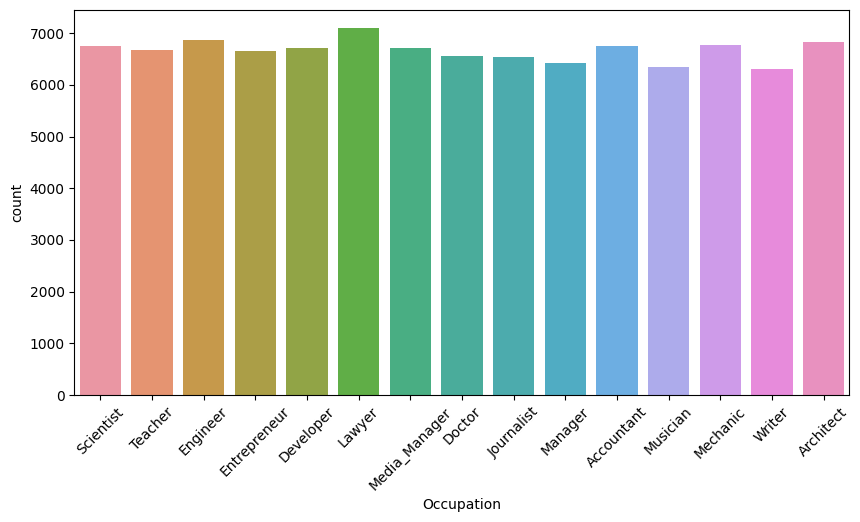

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_1, x = "Occupation")
plt.xticks(rotation=45)
plt.show()

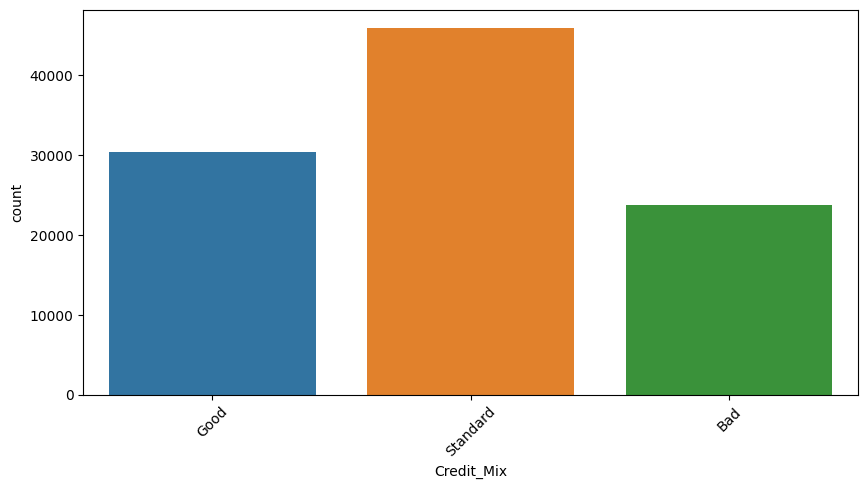

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_1, x = "Credit_Mix")
plt.xticks(rotation=45)
plt.show()

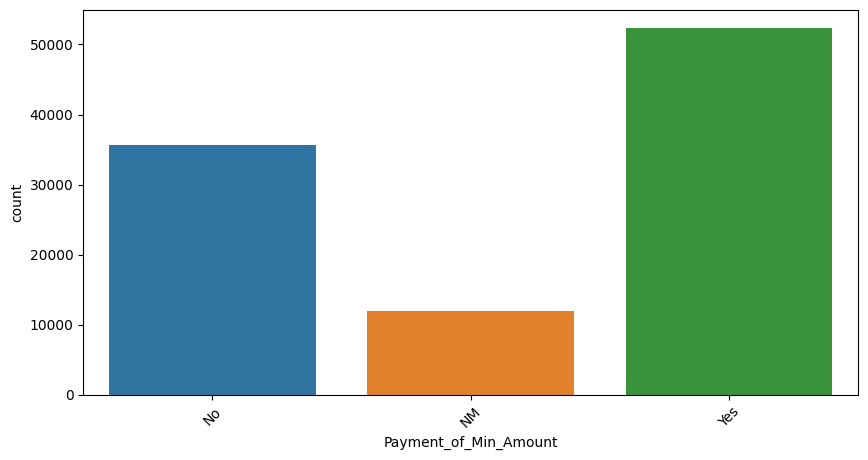

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_1, x = "Payment_of_Min_Amount")
plt.xticks(rotation=45)
plt.show()

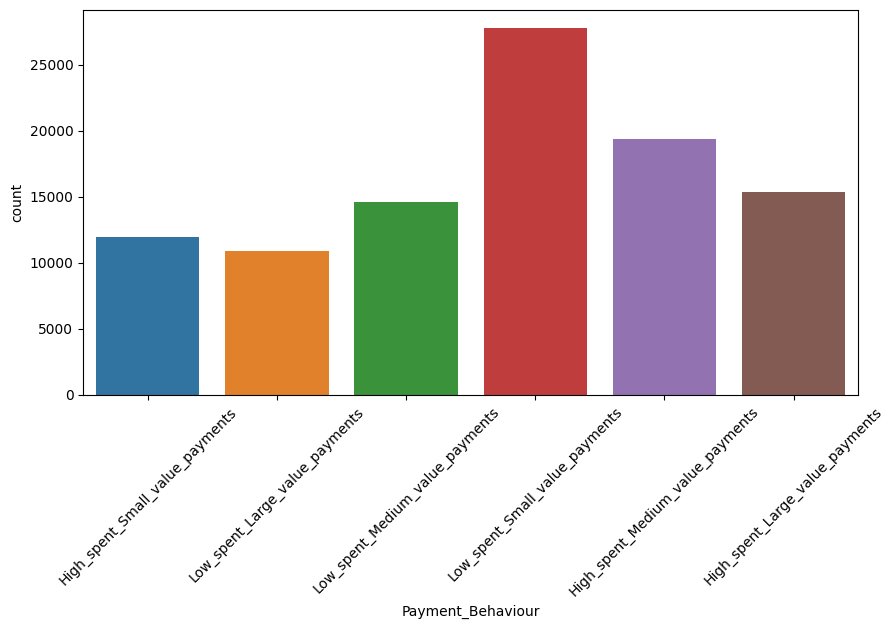

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_1, x = "Payment_Behaviour")
plt.xticks(rotation=45)
plt.show()

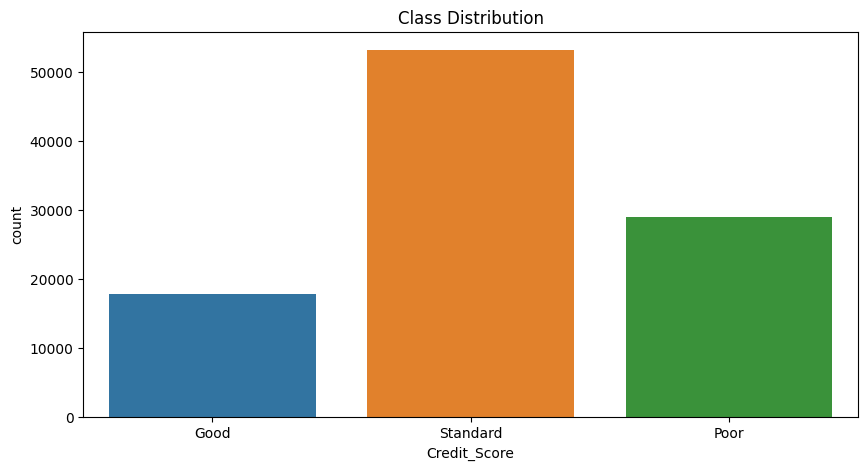

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_1, x = "Credit_Score")
plt.title("Class Distribution")
plt.show()

### Numerical column

In [51]:
# Define Outlier Range
def get_iqr_lower_upper(dataframe, column, multiply=1.5):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    
    lower = q1-iqr*multiply
    upper = q3+iqr*multiply
    affect = dataframe.loc[(dataframe[column]<lower)|(dataframe[column]>upper)].shape
    print('Outliers:', affect)
    return lower, upper

In [52]:
# temp1 = df_1[df_1["Monthly_Inhand_Salary"].notna()]
# temp1 = temp1.groupby("Customer_ID")["Monthly_Inhand_Salary"].apply(list).apply(lambda x: stats.mode(x)[0])
# temp1

# temp2 = df_1[df_1["Monthly_Inhand_Salary"].notna()]
# temp2 = temp2.groupby("Customer_ID")["Monthly_Inhand_Salary"].apply(lambda x: x.mode()[0])
# temp2

# temp1.equals(temp2)
# > True

In [53]:
def replace_group_outliers_fillna(dataframe, group_by, column):
    # drop nan values before doing anything
    df_dropped = dataframe[dataframe[column].notna()]
    # for each customer(group) : list all the values in the column for a group
    df_grouped = df_dropped.groupby(group_by)[column].apply(list)
    # find groupwise mode
    df_grouped = df_grouped.apply(lambda x: stats.mode(x)[0])
    # above dataframe will have groupby modes then calculate min and max of all customers
    mini, maxi = df_grouped.apply([min, max])
    # assign Wrong Values to NaN
    col = dataframe[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)) else x) # or condition
    # Understand that by doing mode i made a prototype representative of all the groups(customers)
    # any point anywhere in the dataset irrespective of its belonging to any group 
    # if (x<mini)|(x>maxi) >>> is considered as outlier and i am filling it with local mode.
    # ------------------------------fill with local mode--------------------------------
    # By default, missing values are not considered while calcuating mode
    # type(x) >> pandas series
    # before assinging check if mode is empty of not
    mode_by_group = dataframe.groupby(group_by)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
    result = col.fillna(mode_by_group)
    # mode_by_group will provide the values to be filled for nulls  
    # fillna takes the index of null value in col and search it in mode_by_group and when it finds it
    # it will replace nan with the found value.
    return result

Age

In [54]:
#Before
df_1.groupby("Customer_ID")["Age"].apply(list)

Customer_ID
1006     [37.0, 38.0, 38.0, 8153.0, 38.0, 38.0, 38.0, 3...
1007      [48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0]
1008     [3452.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 3...
1009      [22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 23.0]
1011      [43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0]
                               ...                        
50984     [20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0]
50990    [38.0, 38.0, 4706.0, 38.0, 38.0, 38.0, 38.0, 3...
50992     [23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 24.0, 24.0]
50996    [3891.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 3...
50999     [46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0]
Name: Age, Length: 12500, dtype: object

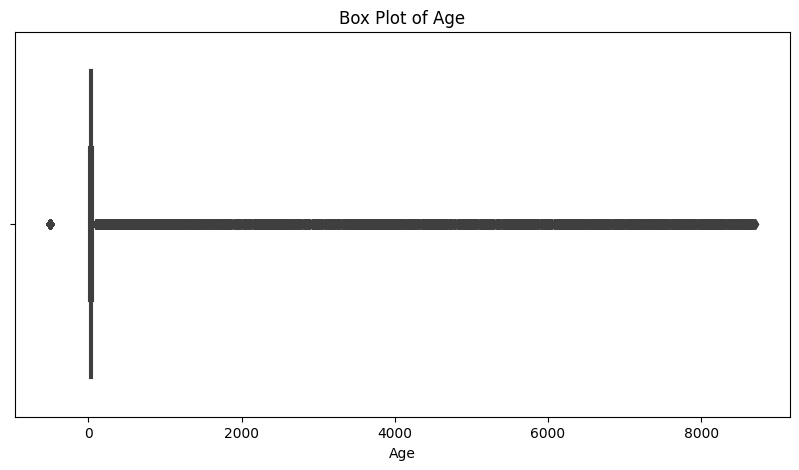

In [55]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Age")
plt.title("Box Plot of Age")
plt.show()

In [56]:
df_1["Age"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Age")

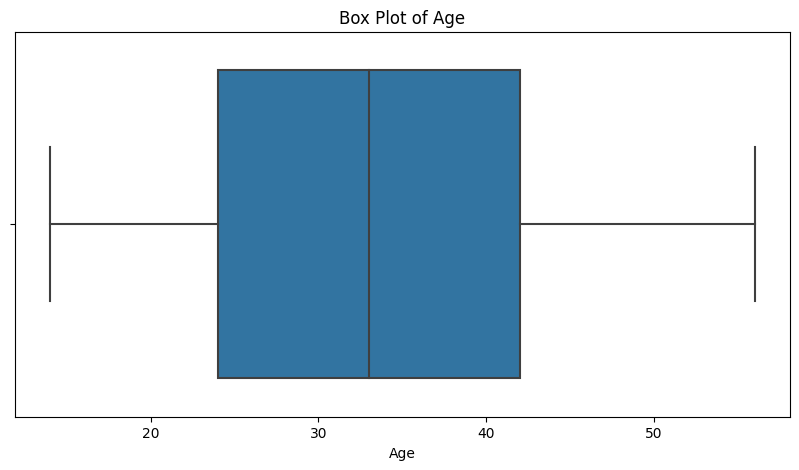

In [57]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Age")
plt.title("Box Plot of Age")
plt.show()

In [58]:
get_iqr_lower_upper(df_1, "Age")
# No outliers (0,25)

Outliers: (0, 25)


(-3.0, 69.0)

Annual_Income

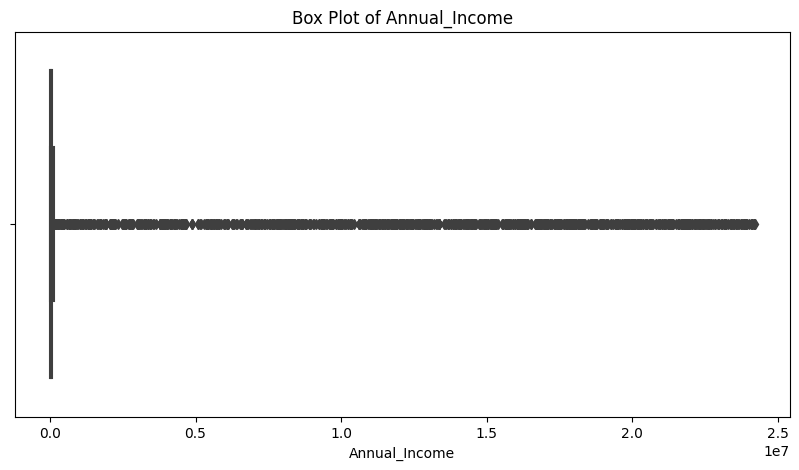

In [60]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Annual_Income")
plt.title("Box Plot of Annual_Income")
plt.show()

In [61]:
df_1["Annual_Income"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Annual_Income")

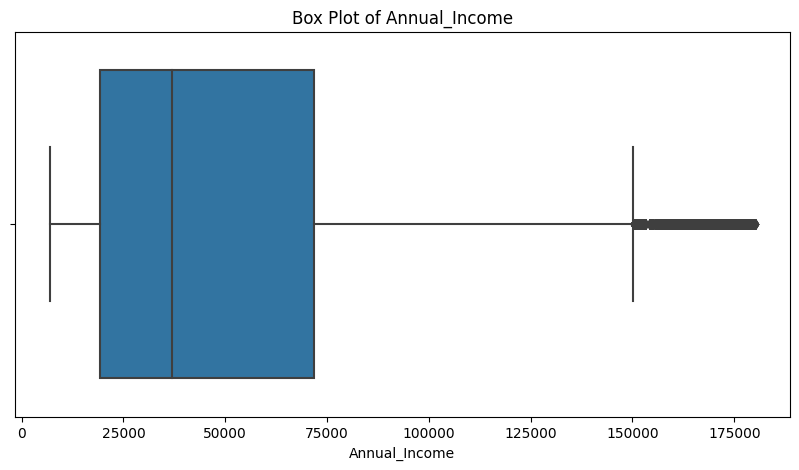

In [63]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Annual_Income")
plt.title("Box Plot of Annual_Income")
plt.show()

In [64]:
get_iqr_lower_upper(df_1, "Annual_Income")
# still has some otliers >>> 2000 to be exact.

Outliers: (2000, 25)


(-59167.77374999999, 150194.21625)

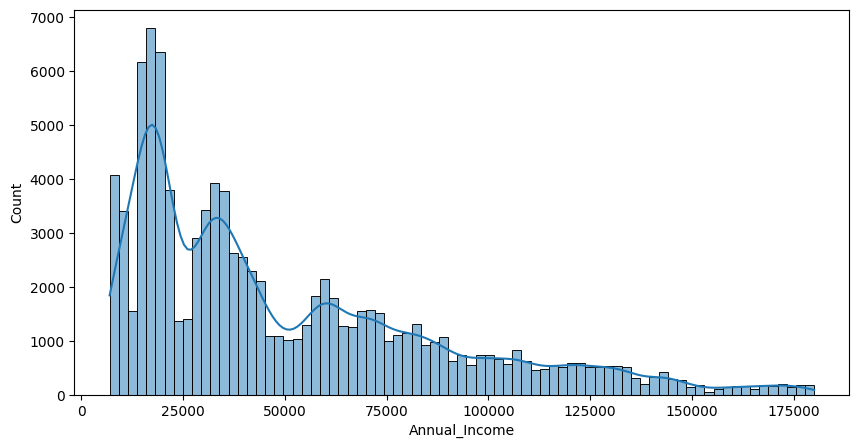

In [65]:
plt.figure(figsize = (10,5))
sns.histplot(data = df_1, x = "Annual_Income",kde=True)
plt.show()

Monthly_Inhand_Salary

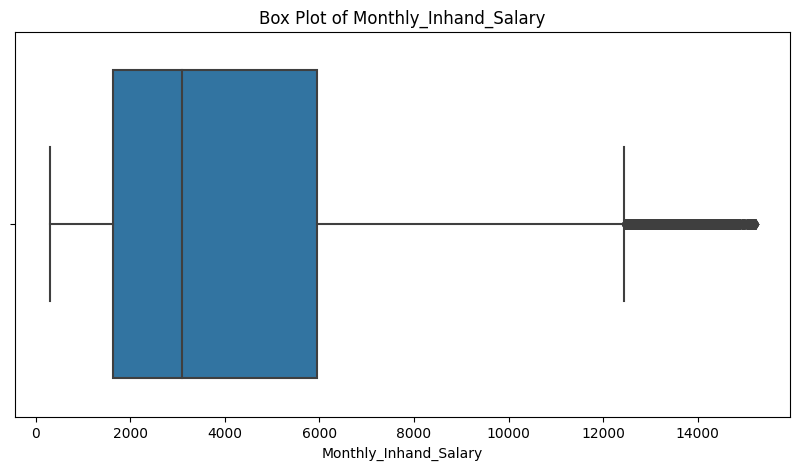

In [67]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Monthly_Inhand_Salary")
plt.title("Box Plot of Monthly_Inhand_Salary")
plt.show()

In [68]:
df_1["Monthly_Inhand_Salary"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Monthly_Inhand_Salary")

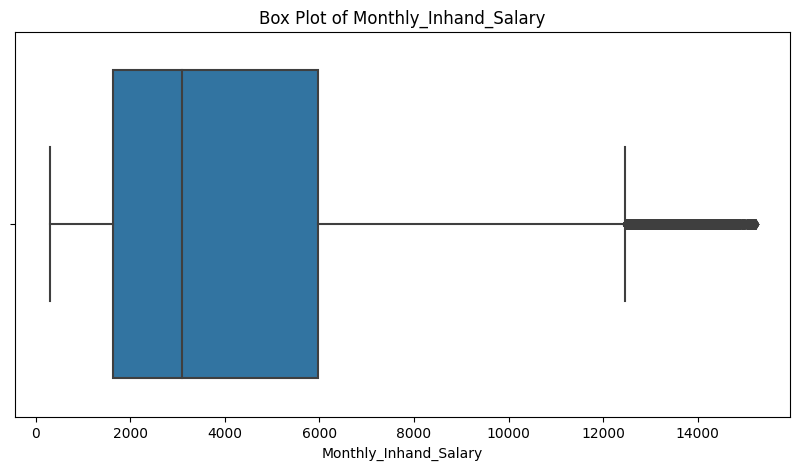

In [70]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Monthly_Inhand_Salary")
plt.title("Box Plot of Monthly_Inhand_Salary")
plt.show()

In [71]:
get_iqr_lower_upper(df_1, "Monthly_Inhand_Salary")
# still has some otliers
# it seems like the replace_group_outliers_fillna function was not that effective on this column

Outliers: (2010, 25)


(-4875.552083333334, 12463.95125)

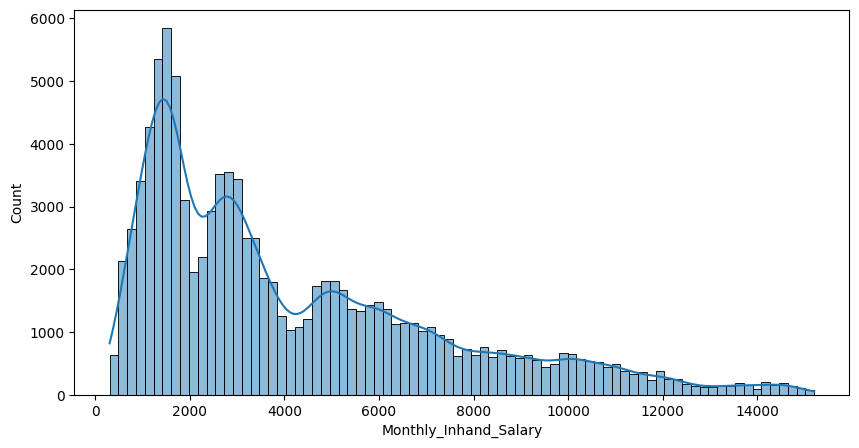

In [72]:
plt.figure(figsize = (10,5))
sns.histplot(data = df_1, x = "Monthly_Inhand_Salary",kde=True)
plt.show()

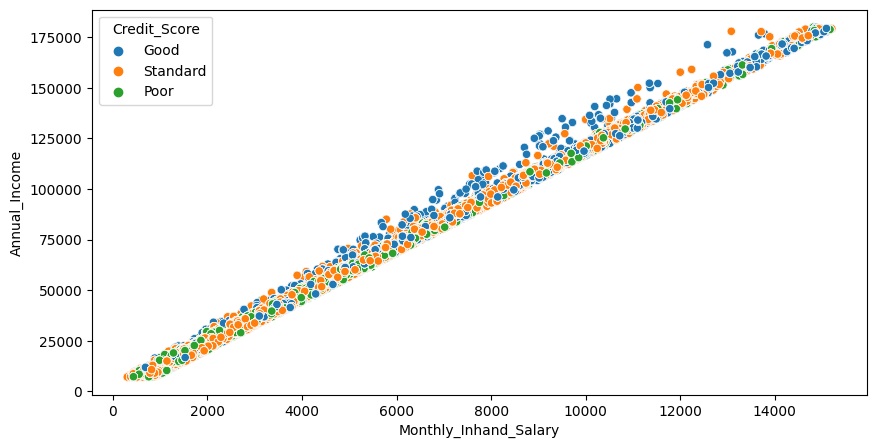

In [73]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=df_1, x="Monthly_Inhand_Salary", y="Annual_Income", hue="Credit_Score")
plt.show()
# high +ve linear corelation between features

Num_Bank_Accounts

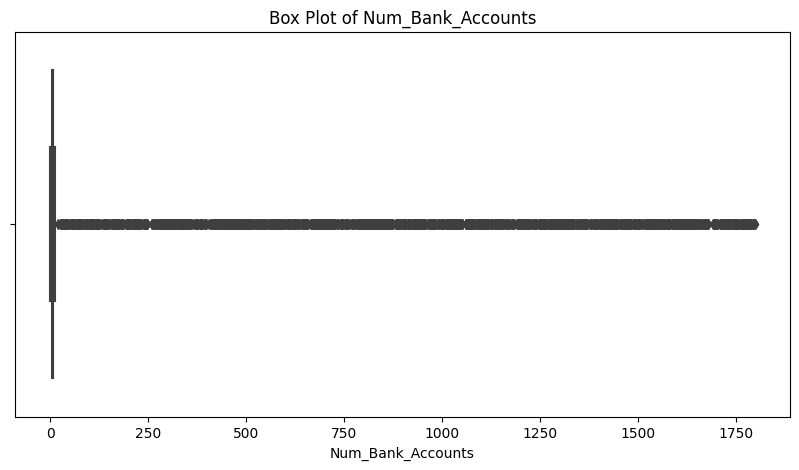

In [75]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_Bank_Accounts")
plt.title("Box Plot of Num_Bank_Accounts")
plt.show()

In [76]:
df_1["Num_Bank_Accounts"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Num_Bank_Accounts")

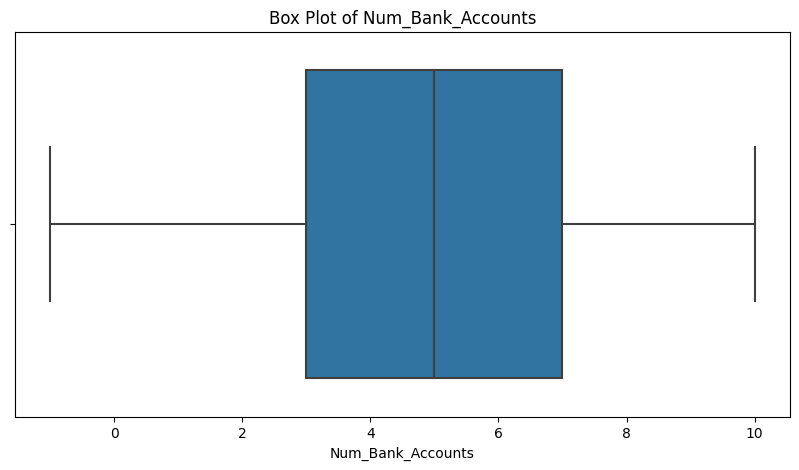

In [78]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_Bank_Accounts")
plt.title("Box Plot of Num_Bank_Accounts")
plt.show()

In [79]:
get_iqr_lower_upper(df_1, "Num_Bank_Accounts")
# no outliers

Outliers: (0, 25)


(-3.0, 13.0)

Num_Credit_Card

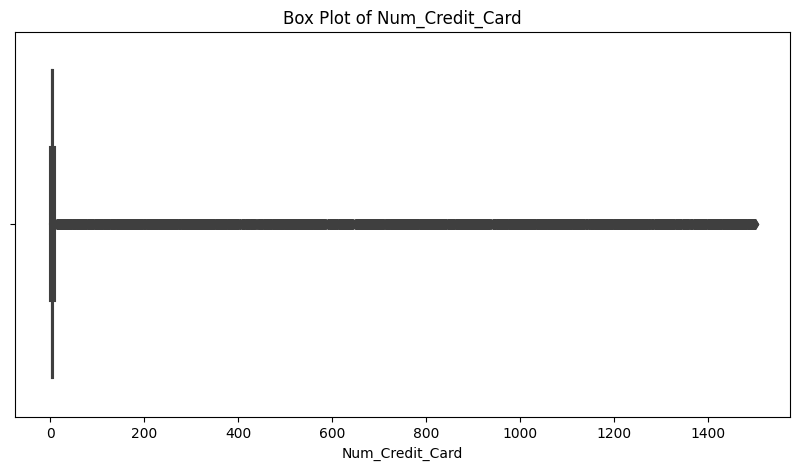

In [81]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_Credit_Card")
plt.title("Box Plot of Num_Credit_Card")
plt.show()

In [82]:
df_1["Num_Credit_Card"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Num_Credit_Card")

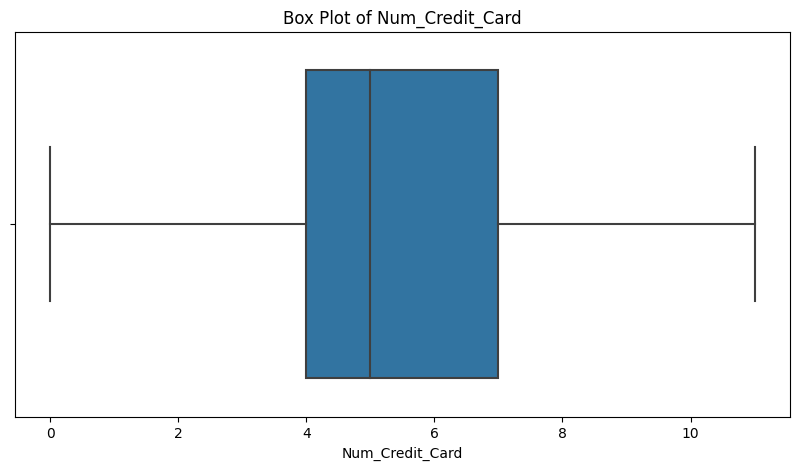

In [84]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_Credit_Card")
plt.title("Box Plot of Num_Credit_Card")
plt.show()

In [85]:
get_iqr_lower_upper(df_1, "Num_Credit_Card")

Outliers: (0, 25)


(-0.5, 11.5)

Interest_Rate

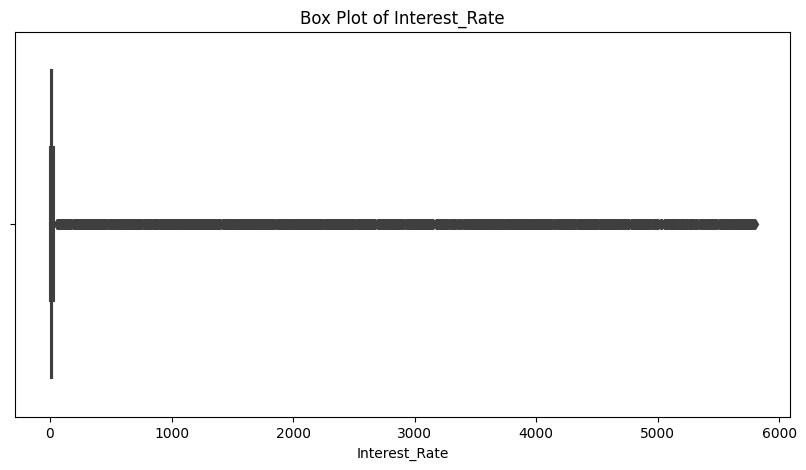

In [87]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Interest_Rate")
plt.title("Box Plot of Interest_Rate")
plt.show()

In [88]:
df_1["Interest_Rate"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Interest_Rate")

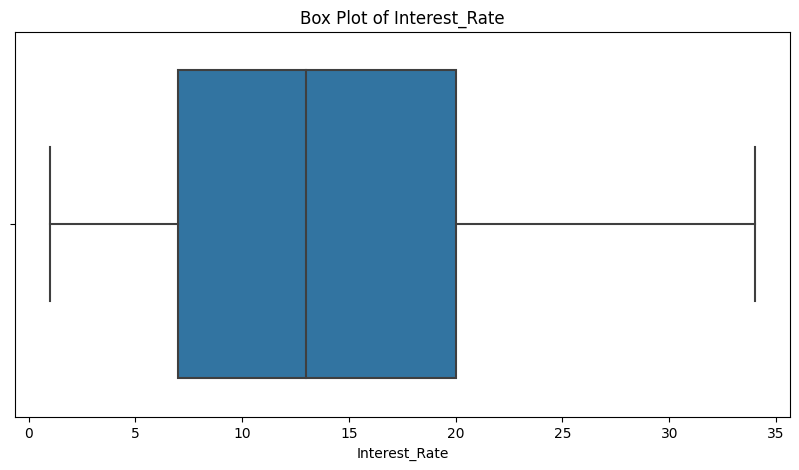

In [90]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Interest_Rate")
plt.title("Box Plot of Interest_Rate")
plt.show()

In [91]:
get_iqr_lower_upper(df_1, "Interest_Rate")

Outliers: (0, 25)


(-12.5, 39.5)

Num_of_Loan

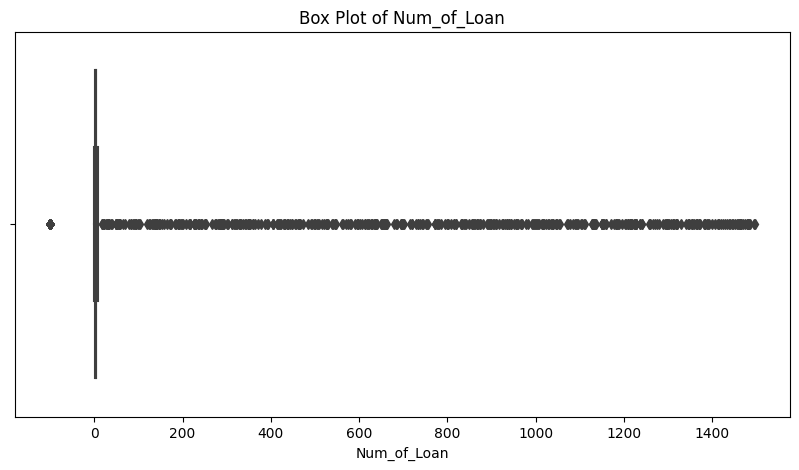

In [93]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_of_Loan")
plt.title("Box Plot of Num_of_Loan")
plt.show()

In [94]:
df_1["Num_of_Loan"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Num_of_Loan")

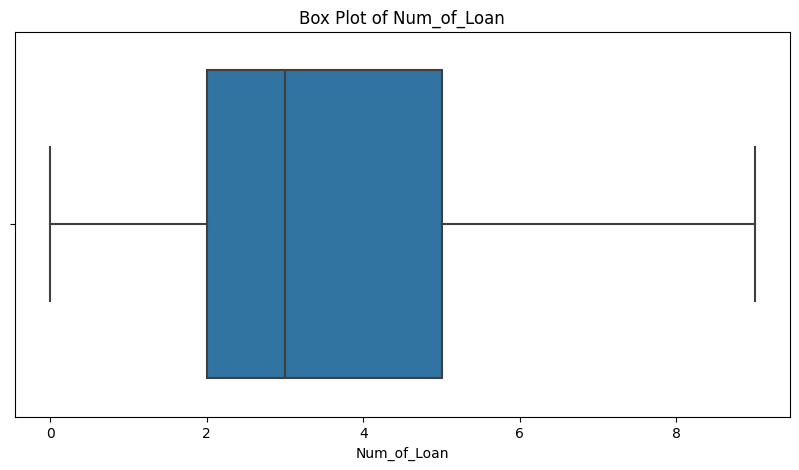

In [96]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_of_Loan")
plt.title("Box Plot of Num_of_Loan")
plt.show()

In [97]:
get_iqr_lower_upper(df_1, "Num_of_Loan")

Outliers: (0, 25)


(-2.5, 9.5)

Delay_from_due_date

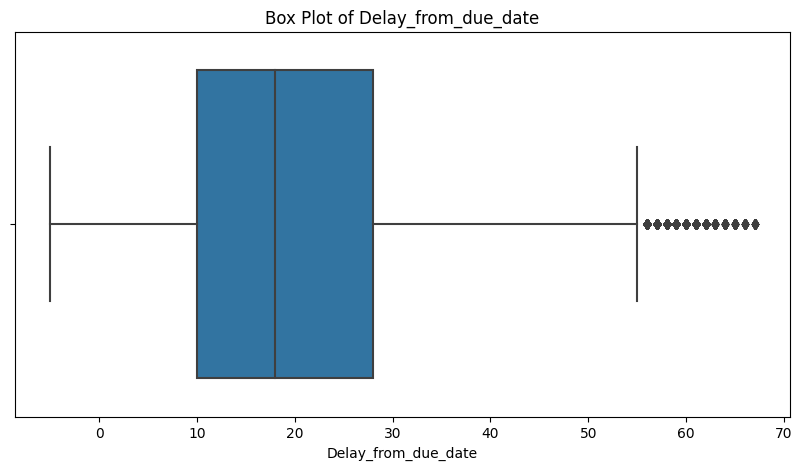

In [99]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Delay_from_due_date")
plt.title("Box Plot of Delay_from_due_date")
plt.show()

In [100]:
df_1["Delay_from_due_date"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Delay_from_due_date")

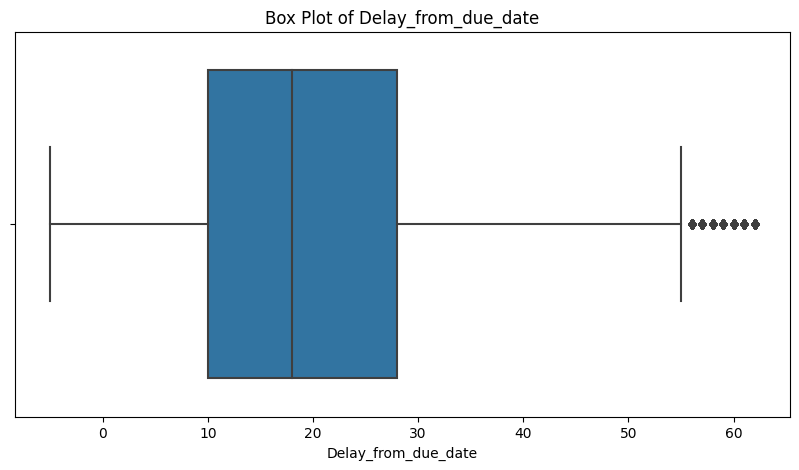

In [102]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Delay_from_due_date")
plt.title("Box Plot of Delay_from_due_date")
plt.show()

In [103]:
get_iqr_lower_upper(df_1, "Delay_from_due_date")

Outliers: (4002, 25)


(-17.0, 55.0)

Num_of_Delayed_Payment

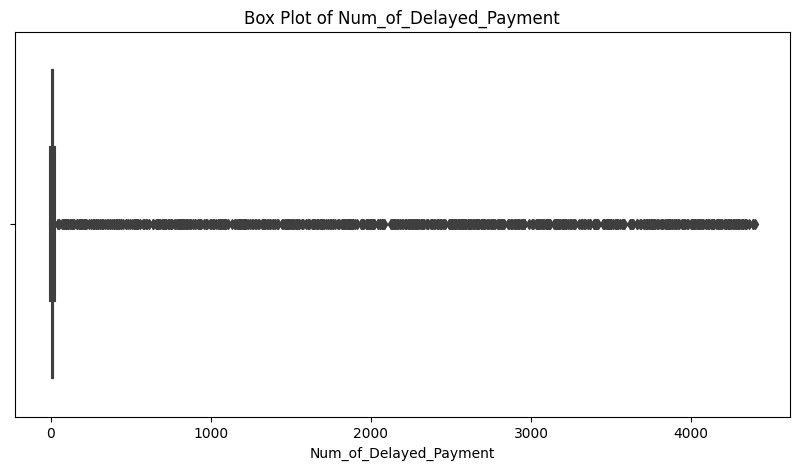

In [105]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_of_Delayed_Payment")
plt.title("Box Plot of Num_of_Delayed_Payment")
plt.show()

In [106]:
df_1["Num_of_Delayed_Payment"] = replace_group_outliers_fillna(df_1, "Customer_ID","Num_of_Delayed_Payment")

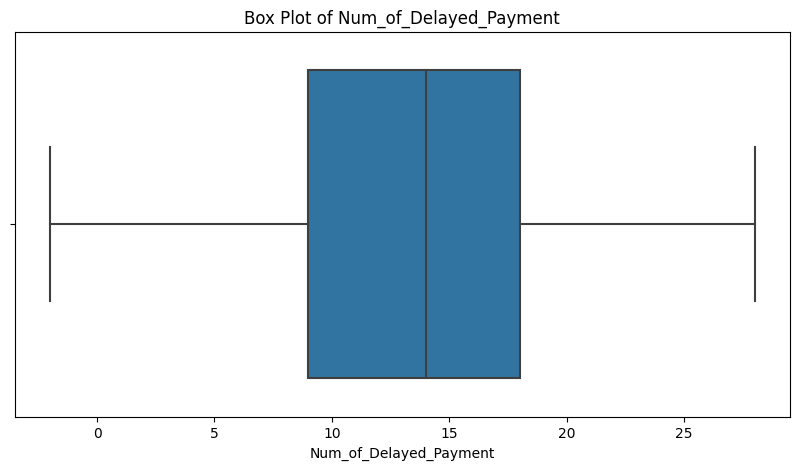

In [108]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_of_Delayed_Payment")
plt.title("Box Plot of Num_of_Delayed_Payment")
plt.show()

In [109]:
get_iqr_lower_upper(df_1, "Num_of_Delayed_Payment")

Outliers: (0, 25)


(-4.5, 31.5)

Changed_Credit_Limit

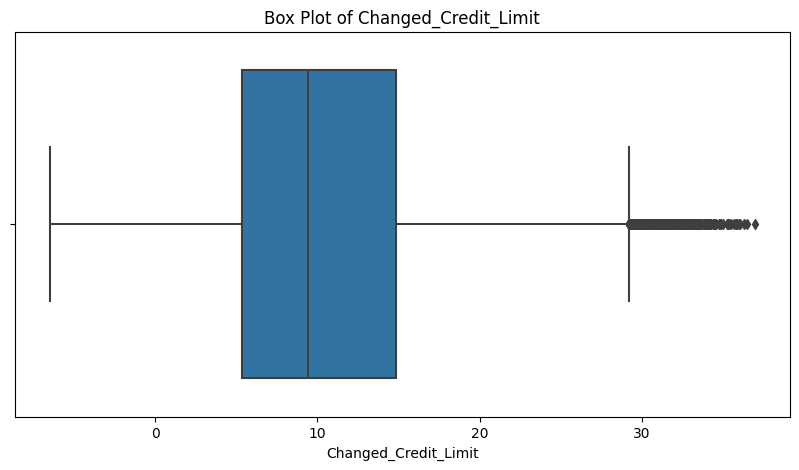

In [111]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Changed_Credit_Limit")
plt.title("Box Plot of Changed_Credit_Limit")
plt.show()

In [112]:
df_1["Changed_Credit_Limit"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Changed_Credit_Limit")

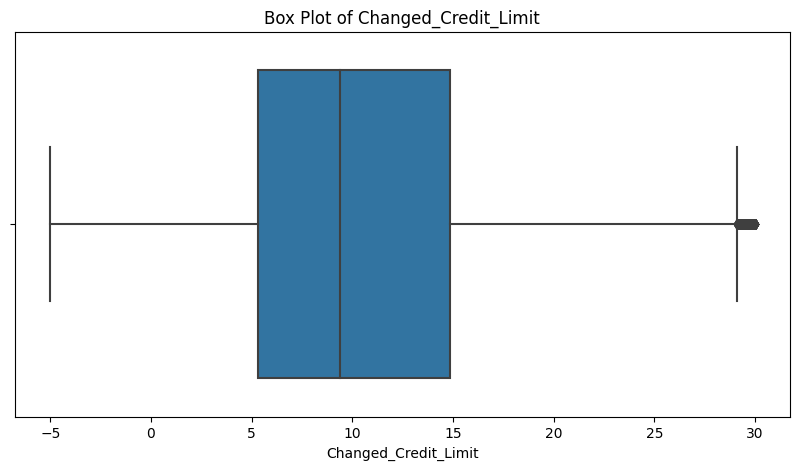

In [114]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Changed_Credit_Limit")
plt.title("Box Plot of Changed_Credit_Limit")
plt.show()

In [115]:
get_iqr_lower_upper(df_1, "Changed_Credit_Limit")

Outliers: (522, 25)


(-8.925, 29.115000000000002)

Num_Credit_Inquiries

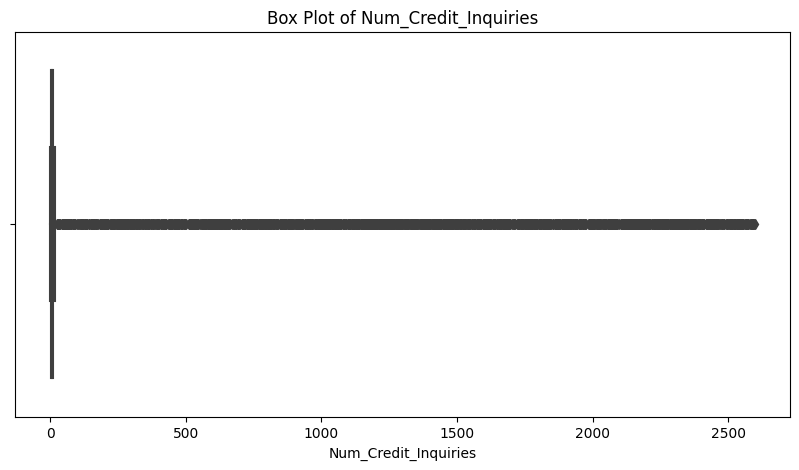

In [117]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_Credit_Inquiries")
plt.title("Box Plot of Num_Credit_Inquiries")
plt.show()

In [118]:
df_1["Num_Credit_Inquiries"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Num_Credit_Inquiries")

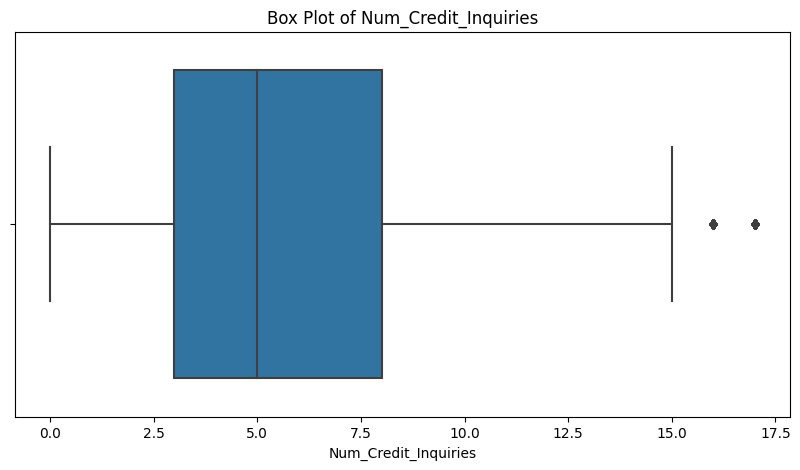

In [120]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_Credit_Inquiries")
plt.title("Box Plot of Num_Credit_Inquiries")
plt.show()

Outstanding_Debt

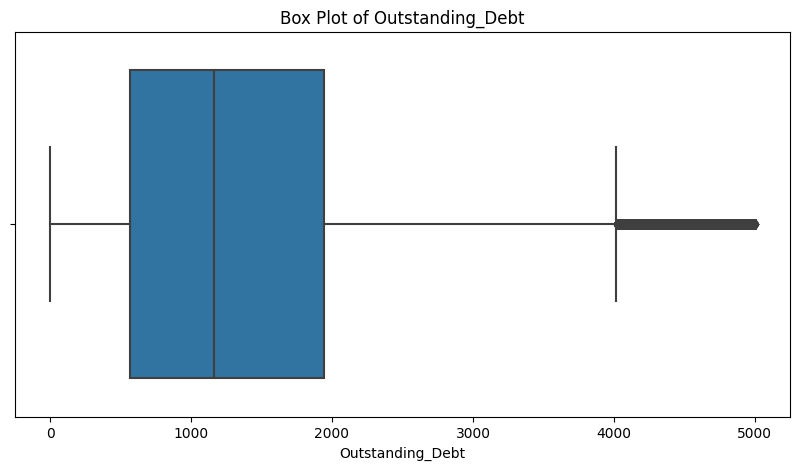

In [122]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Outstanding_Debt")
plt.title("Box Plot of Outstanding_Debt")
plt.show()

In [123]:
df_1["Outstanding_Debt"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Outstanding_Debt")

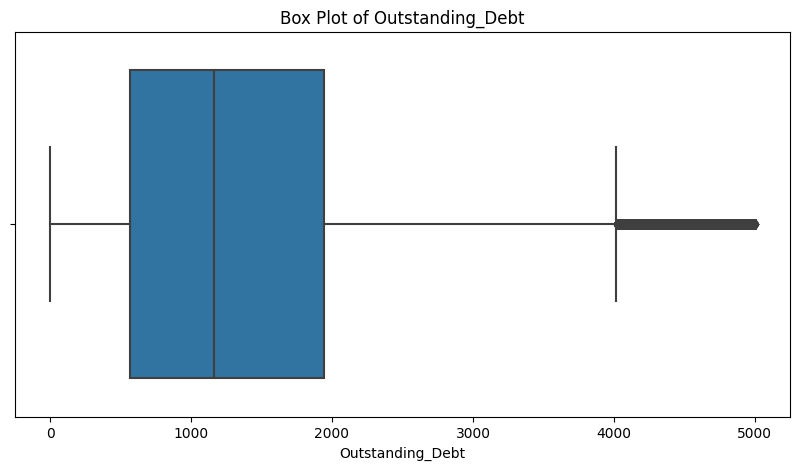

In [125]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Outstanding_Debt")
plt.title("Box Plot of Outstanding_Debt")
plt.show()

Credit_Utilization_Ratio

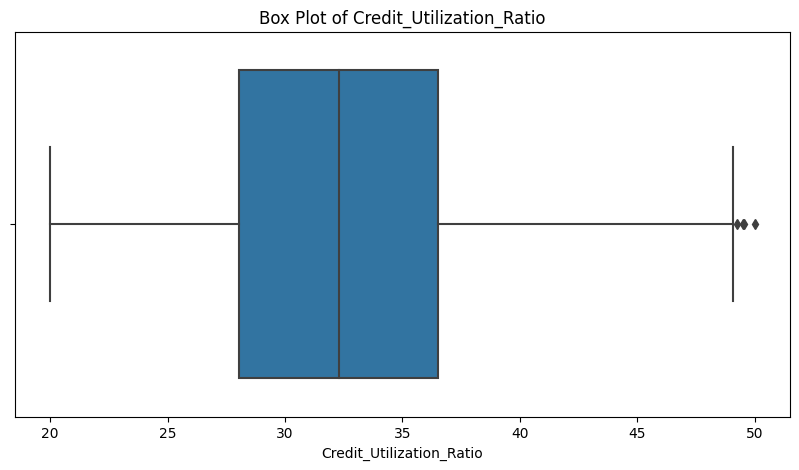

In [127]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Credit_Utilization_Ratio")
plt.title("Box Plot of Credit_Utilization_Ratio")
plt.show()

In [128]:
df_1["Credit_Utilization_Ratio"].isnull().sum()
# not required

0

Credit_History_Age

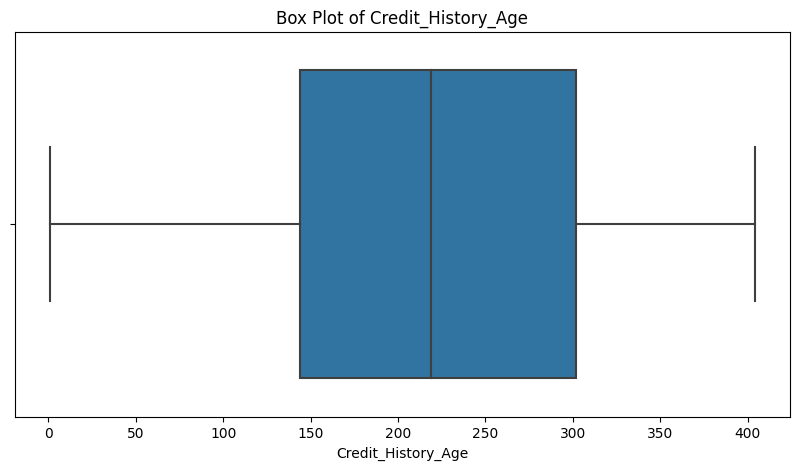

In [130]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Credit_History_Age")
plt.title("Box Plot of Credit_History_Age")
plt.show()

In [131]:
df_1['Credit_History_Age'] = df_1.groupby("Customer_ID", group_keys=False)["Credit_History_Age"].apply(lambda x: x.interpolate().bfill().ffill())

# filling NaN with interpolate medthod
# bfill > back fill
# ffill > forward fill

# FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
# To preserve the previous behavior, use

# 	>>> .groupby(..., group_keys=False) [WORKING]

# To adopt the future behavior and silence this warning, use 

# 	>>> .groupby(..., group_keys=True)
#   df_1['Credit_History_Age'] = df_1.groupby("Customer_ID")["Credit_History_Age"].apply(lambda x: x.interpolate().bfill().ffill())

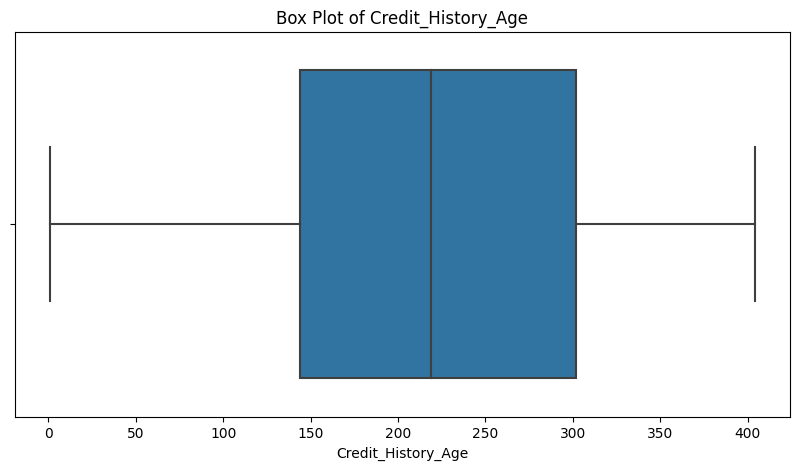

In [133]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Credit_History_Age")
plt.title("Box Plot of Credit_History_Age")
plt.show()

Total_EMI_per_month

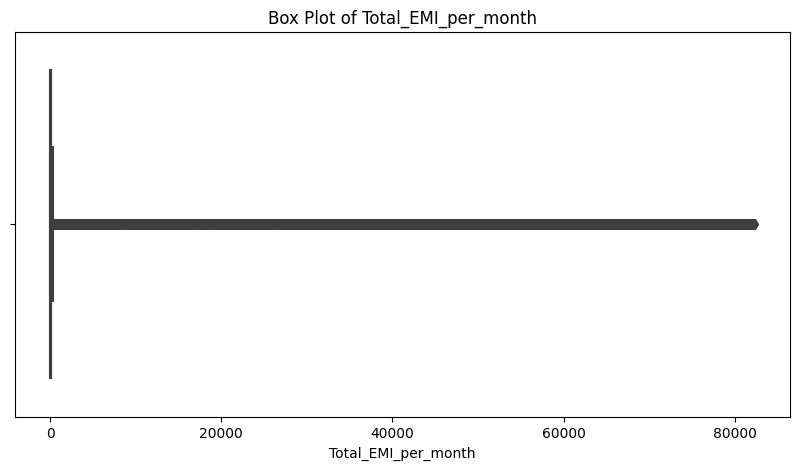

In [135]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Total_EMI_per_month")
plt.title("Box Plot of Total_EMI_per_month")
plt.show()

In [136]:
df_1["Total_EMI_per_month"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Total_EMI_per_month")

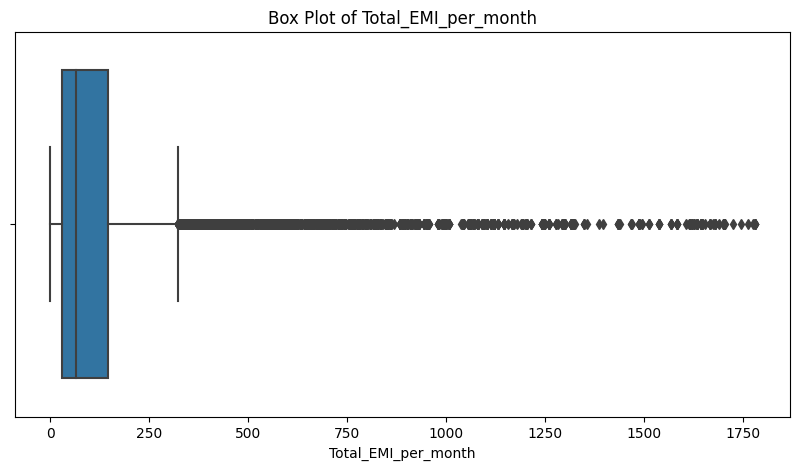

In [138]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Total_EMI_per_month")
plt.title("Box Plot of Total_EMI_per_month")
plt.show()

In [139]:
get_iqr_lower_upper(df_1, "Total_EMI_per_month")

Outliers: (5052, 25)


(-147.48001686549193, 323.76380380888094)

Amount_invested_monthly

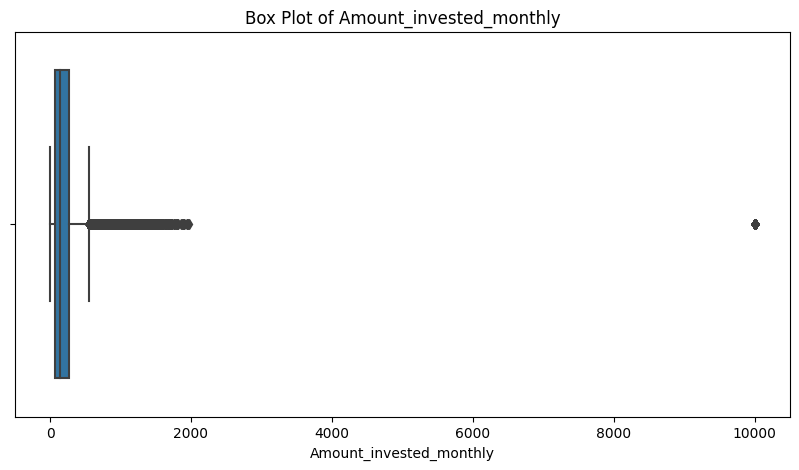

In [141]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Amount_invested_monthly")
plt.title("Box Plot of Amount_invested_monthly")
plt.show()

In [142]:
df_1["Amount_invested_monthly"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Amount_invested_monthly")

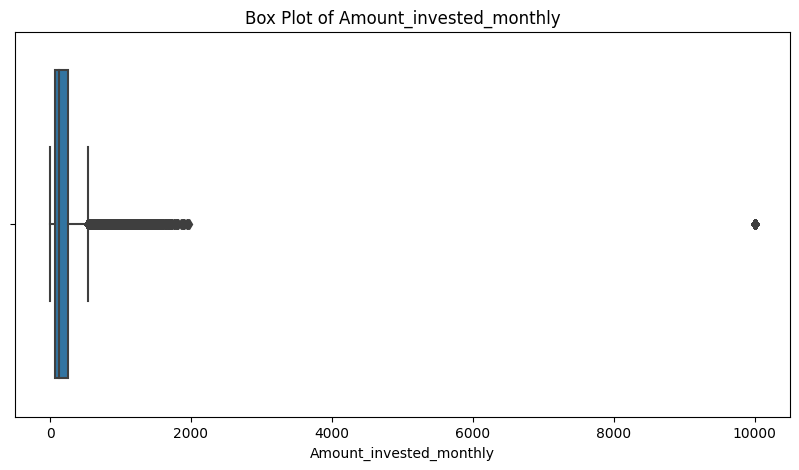

In [144]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Amount_invested_monthly")
plt.title("Box Plot of Amount_invested_monthly")
plt.show()

Monthly_Balance

In [146]:
df_1["Monthly_Balance"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Monthly_Balance")

In [147]:
missing_data(df_1)
# no missing value

,Feature,Null_Values,%_age


Num_Bank_Accounts, Delay_from_due_date, Num_of_Delayed_Payment, Monthly_Balance have negative strange number Amount_invested_monthly have positive strange number

Num_Bank_Accounts : Cannot be less than 0

In [149]:
df_1[df_1["Customer_ID"]==22931]
# see this customer has negative bank account which cant be possible

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
55632,22931,1,40.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,student loan,8.0,3.0,9.11,0.0,Good,644.57,37.488977,281.0,No,16.483566,187.641645,Low_spent_Small_value_payments,317.609039,Standard
55633,22931,2,40.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,student loan,5.0,3.0,9.11,0.0,Good,644.57,30.230648,282.0,No,16.483566,143.322972,High_spent_Small_value_payments,331.927711,Standard
55634,22931,3,40.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,student loan,12.0,3.0,9.11,0.0,Good,644.57,38.822428,283.0,No,16.483566,60.681956,High_spent_Small_value_payments,414.568728,Standard
55635,22931,4,40.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,student loan,8.0,3.0,9.11,0.0,Good,644.57,36.351893,284.0,NM,16.483566,54.569799,High_spent_Large_value_payments,400.680884,Standard
55636,22931,5,40.0,Developer,30352.11,2317.3425,-1.0,5.0,7.0,1.0,student loan,8.0,3.0,10.11,0.0,Good,644.57,25.532001,285.0,NM,16.483566,126.665345,Low_spent_Medium_value_payments,368.585338,Standard
55637,22931,6,40.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,student loan,8.0,3.0,5.11,0.0,Good,644.57,31.813259,286.0,No,16.483566,54.821327,High_spent_Large_value_payments,400.429357,Standard
55638,22931,7,41.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,student loan,11.0,3.0,9.11,0.0,Good,644.57,26.574175,287.0,No,16.483566,64.860838,High_spent_Large_value_payments,400.389846,Standard
55639,22931,8,41.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,student loan,8.0,4.0,7.11,0.0,Good,644.57,32.937399,288.0,No,16.483566,89.622962,High_spent_Medium_value_payments,375.627721,Standard


In [150]:
# hence replace them with zero
df_1.loc[df_1["Num_Bank_Accounts"]<0, "Num_Bank_Accounts"]=0

Delay_from_due_date : Cannot be less than 0

In [151]:
# replacing zero with NaN
df_1.loc[df_1["Delay_from_due_date"]<0, "Delay_from_due_date"] = np.NaN

In [152]:
df_1["Delay_from_due_date"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Delay_from_due_date")

Num_of_Delayed_Payment : Cannot be less than 0

In [153]:
df_1.loc[df_1["Num_of_Delayed_Payment"]<0, "Num_of_Delayed_Payment"] = np.NaN

In [154]:
df_1["Num_of_Delayed_Payment"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Num_of_Delayed_Payment")

Monthly_Balance : Cannot be less than 0

In [155]:
df_1.loc[df_1["Monthly_Balance"]<0, "Monthly_Balance"] = np.NaN

In [156]:
df_1["Monthly_Balance"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Monthly_Balance")

Amount_invested_monthly

In [157]:
get_iqr_lower_upper(df_1, "Amount_invested_monthly")

Outliers: (10666, 25)


(-208.03825932668485, 536.1234129340274)

This feature has too many outliers.

In [160]:
df_1["Amount_invested_monthly"].describe()

count    100000.000000
mean        628.430036
std        2036.575655
min           0.000000
25%          71.022368
50%         130.572167
75%         257.062786
max       10000.000000
Name: Amount_invested_monthly, dtype: float64

In [161]:
# Anything above the max value is considered as outlier.
df_1.loc[df_1["Amount_invested_monthly"]>=10000, "Amount_invested_monthly"] = np.NaN

In [162]:
# fill group Mode
df_1["Amount_invested_monthly"] = df_1.groupby("Customer_ID")["Amount_invested_monthly"].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

In [163]:
get_iqr_lower_upper(df_1, "Amount_invested_monthly")

Outliers: (5160, 25)


(-41.81959432378041, 156.43106044855273)

In [164]:
df_1.to_csv("Data/cleaned_train.csv",index=False)